In [1]:
#import major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
%matplotlib inline

df = pd.read_csv('twitter-archive-enhanced.csv')

df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
#Download all dog image prediction files using requests

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
    
images = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Gather

In [3]:
#Authentication codes
import tweepy

consumer_key = 'LXO6U72nDiVhp46dhz4d7vA0B'
consumer_secret = 'MXT9V59O1d9WLMzfN6dnfpxnO5j65RCtOB6HeRbM4SySfjBk0K'
access_token = '1047283489614094336-4msj3L6yrulVaTmmDFqa6vK9ER9MDM'
access_secret = 'aFTqKDwGd624RQFRgqfzkLSlLmHgUvsr1OUUajgV9S99c'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth,
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [ ]:
#Create a list of tweet id's to look through
#The except function is to catch all of the missing data

tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    #try:
        tweet_status = api.get_status(tweet,wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Cant find: " + str(tweet))

In [ ]:
#Write data to a JSON file

import json

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [4]:
tweet_df = pd.read_json('tweet_json.txt',orient='index')


In [5]:
tweet_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2553,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,128,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,297,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,140,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


## Assess

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
images.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
tweet_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2341 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2341 non-null datetime64[ns]
entities                         2341 non-null object
extended_entities                1822 non-null object
favorite_count                   2341 non-null int64
favorited                        2341 non-null int64
geo                              0 non-null float64
id                               2341 non-null int64
id_str                           2341 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

## Clean

## Quality issues

- Get rid of all retweets from both the df and tweet_df tables (2)
- Dog names in df are missing if the name was not found in the description 
- Capitalize words in Images
- Rename id in tweet_df to tweet_id to match the rest
- Drop columns that are not needed
- Re-extract the ratings columns
- Tweet_id should be a string
- Make sure the entire numberator is captured for the ratings
- Change timestamps to date time format

## Tidyness Issues

- Make doggo, floofer, pupper and puffo into 1 column
- Join tables on tweet_id

In [9]:
# Make clean dataframes 
df_clean = df.copy()
images_clean = images.copy()
tweet_df_clean = tweet_df.copy()

#### Define

Dog names were pulled wrong from the description. Change to None.

Since all names start with a capital letter, I will just change names starting with lower case characters to None

#### Code

In [10]:
#Loop to check if each name start with lower case and changing accordingly
for _ in range(len(df_clean.name)):
    if df_clean.name[_][0].islower():
        df_clean.name[_] == 'None'

#### Test

In [11]:
df_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

#### Define

Get rid of all tweets that are retweets.

#### Code

In [12]:
#Filter out retweets by seeing if the id is null
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()== True]

#### Test

In [13]:
#retweeted_status_id should be 0
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Code

In [14]:
#Filter out retweets by seeing if the id is null
tweet_df_clean = tweet_df_clean[tweet_df_clean['retweeted_status'].isnull()== True]

#### Test

In [15]:
#retweeted_status should be 0
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
entities                         2174 non-null object
extended_entities                1748 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
geo                              0 non-null float64
id                               2174 non-null int64
id_str                           2174 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  21

#### Define

Denominator should be 10 for all. 

#### Code

In [16]:
#Filter out denominators that are not 10

df_clean = df_clean[df_clean['rating_denominator']==10]


#### Test

In [17]:
#Should be blank

df_clean[df_clean['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

Make sure all words have the first letter capitalized for consistency.

#### Code

In [18]:
images_clean['p1'] = images_clean['p1'].str.capitalize()
images_clean['p2'] = images_clean['p2'].str.capitalize()
images_clean['p3'] = images_clean['p3'].str.capitalize()

#### Test

In [19]:
images_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_turtle,0.933012,False,Mud_turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_mastiff,0.058279,True,Fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_cart,0.962465,False,Shopping_basket,0.014594,False,Golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,Komondor,0.192305,True,Soft-coated_wheaten_terrier,0.082086,True


#### Define

Programatically look back into the text and extract ratings

#### Code

In [20]:
#Use regex to look into text and get accurate ratings

df_clean[['rating_numerator','rating_denominator']] = df_clean['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)


#### Test

In [21]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define

Rename id column to match the rest

#### Code

In [22]:
tweet_df_clean = tweet_df_clean.rename(columns = {'id':'tweet_id'})

#### Test

In [23]:
tweet_df_clean

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2553,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,128,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,297,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,140,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:05:58.794694657,NaN,NaN,2015-11-16 00:30:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/fv...,132,0,NaN,666050758794694656,666050758794694656,...,NaN,NaN,NaN,59,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:24:13.826850816,NaN,NaN,2015-11-16 00:35:11,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/v5...,1209,0,NaN,666051853826850816,666051853826850816,...,NaN,NaN,NaN,843,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:25:25.042405380,NaN,NaN,2015-11-16 00:49:46,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/rd...,433,0,NaN,666055525042405376,666055525042405376,...,NaN,NaN,NaN,247,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:51:30.499244032,NaN,NaN,2015-11-16 00:55:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/yW...,294,0,NaN,666057090499244032,666057090499244032,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-09 00:16:40.524156928,NaN,NaN,2015-11-16 01:01:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/pY...,111,0,NaN,666058600524156928,666058600524156928,...,NaN,NaN,NaN,57,0,NaN,"<a href

#### Define

Change tweet_id to strings for all tables.

#### Code

In [24]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
images_clean['tweet_id'] = images_clean['tweet_id'].astype(str)
tweet_df_clean['tweet_id'] = tweet_df_clean['tweet_id'].astype(str)



#### Test

In [25]:
tweet_df_clean

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2553,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,128,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,297,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,140,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:05:58.794694657,NaN,NaN,2015-11-16 00:30:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/fv...,132,0,NaN,666050758794694656,666050758794694656,...,NaN,NaN,NaN,59,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:24:13.826850816,NaN,NaN,2015-11-16 00:35:11,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/v5...,1209,0,NaN,666051853826850816,666051853826850816,...,NaN,NaN,NaN,843,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:25:25.042405380,NaN,NaN,2015-11-16 00:49:46,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/rd...,433,0,NaN,666055525042405376,666055525042405376,...,NaN,NaN,NaN,247,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:51:30.499244032,NaN,NaN,2015-11-16 00:55:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/yW...,294,0,NaN,666057090499244032,666057090499244032,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-09 00:16:40.524156928,NaN,NaN,2015-11-16 01:01:59,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/pY...,111,0,NaN,666058600524156928,666058600524156928,...,NaN,NaN,NaN,57,0,NaN,"<a href

#### Define

Put all of the dog stages into 1 column

#### Code

In [26]:
#Change the 4 stages into 1 column

df_clean['dog_age'] = df_clean['doggo']+df_clean['floofer']+df_clean['pupper']+df_clean['puppo']
df_clean['dog_age']= df_clean['dog_age'].str.replace('None', ',')
df_clean['dog_age'] = df_clean['dog_age'].str.strip(',')
df_clean['dog_age'] = df_clean['dog_age'].str.strip('')

df_clean.loc[200, 'dog_age'] = 'doggo,floofer'
df_clean.loc[191, 'dog_age'] = 'doggo,puppo'

#### Test

In [27]:
df_clean['dog_age'].value_counts()



                 1809
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_age, dtype: int64

#### Define

Drop columns that are not useful

#### Code

In [28]:
#drop columns with .drop

df_clean.drop(['in_reply_to_status_id',
               'in_reply_to_user_id',
               'source','retweeted_status_user_id',
               'retweeted_status_timestamp',
               'expanded_urls',
               'doggo',
               'floofer',
               'pupper',
               'puppo'], axis = 1, inplace =True)

tweet_df_clean.drop(['contributors',
                    'coordinates',
                    'created_at',
                    'entities',
                    'extended_entities',
                    'geo',
                    'id_str',
                    'quoted_status_id_str',
                    'user'], axis = 1, inplace =True)

#### Test

In [29]:
#If the above columns are not in here then it was successful

df_clean

,tweet_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,dog_age
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,NaN,13,10,None,
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,NaN,13,10,Jax,
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,NaN,13,10,None,
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,NaN,13,10,Zoey,
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,NaN,14,10,Cassie,doggo


#### Define

Change timestamp to date time format

#### Code

In [30]:
#Make a regex to capture the format in our data

df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

#### Test

In [31]:
#Check if timestamp ie datetime

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id               2153 non-null object
timestamp              2153 non-null datetime64[ns]
text                   2153 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       2153 non-null object
rating_denominator     2153 non-null object
name                   2153 non-null object
dog_age                2153 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 231.4+ KB


### Define

Merge all the tables together by tweed id so we can run analysis easier

### Code

In [32]:
#Use inner joins to merge tables

merged = pd.merge(df_clean, tweet_df_clean,on='tweet_id', how='inner')
merged = pd.merge(merged, images_clean,on='tweet_id', how='inner')

### Test

In [33]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1288 entries, 0 to 1287
Data columns (total 39 columns):
tweet_id                         1288 non-null object
timestamp                        1288 non-null datetime64[ns]
text_x                           1288 non-null object
retweeted_status_id              0 non-null float64
rating_numerator                 1288 non-null object
rating_denominator               1288 non-null object
name                             1288 non-null object
dog_age                          1288 non-null object
favorite_count                   1288 non-null int64
favorited                        1288 non-null int64
in_reply_to_screen_name          14 non-null object
in_reply_to_status_id            14 non-null float64
in_reply_to_status_id_str        14 non-null float64
in_reply_to_user_id              14 non-null float64
in_reply_to_user_id_str          14 non-null float64
is_quote_status                  1288 non-null int64
lang                            

# Storing, Analyzing, and Visualizing

## Store the clean data

In [34]:
#Create a folder as long as its not already made and save to the folder

folder = 'Wrange_and_Analyze_project'
if not os.path.exists(folder):
    os.makedirs(folder)

merged.to_csv('Wrange_and_Analyze_project/df.csv')
images_clean.to_csv('Wrange_and_Analyze_project/images.csv')

## Analyze

In [35]:
#Read files in
df = pd.read_csv('Wrange_and_Analyze_project/df.csv')
images = pd.read_csv('Wrange_and_Analyze_project/images.csv')

list(df)

['Unnamed: 0',
 'tweet_id',
 'timestamp',
 'text_x',
 'retweeted_status_id',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_age',
 'favorite_count',
 'favorited',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text_y',
 'truncated',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [36]:
#Create a dataframe to see run descriptive stats

pd.set_option('display.precision',10)

df_stats = merged[['rating_numerator',
   'favorite_count',
   'retweet_count',
   'p1_conf',
   'p2_conf',
   'p3_conf']]

df_stats.describe()

,favorite_count,retweet_count,p1_conf,p2_conf,p3_conf
count,1288.0000000000,1288.0000000000,1288.0000000000,1288.0000000000,1288.0000000000
mean,8258.2569875776,2502.5046583851,0.5867628579,0.1375625072,0.0615590547
std,11463.3029209292,4019.7343717662,0.2737874434,0.1020044617,0.0521620186
min,80.0000000000,12.0000000000,0.0443334000,0.0000000101,0.0000000002
25%,1693.7500000000,570.0000000000,0.3546275000,0.0547038000,0.0163642500
50%,3805.5000000000,1238.0000000000,0.5769355000,0.1206915000,0.0498004000
75%,10272.2500000000,2968.0000000000,0.8365870000,0.1994975000,0.0947689250
max,121499.0000000000,60102.0000000000,1.0000000000,0.4676780000,0.2710420000


## Insights



- The mean favorite count is 8260 with the most favorited tweet having 121541.
- The mean retweet count is 2503 with the most retweeted tweet having 60123 retweets. 
- Standard deviation is very high with favorites and retweets.
- P1 has the highest prediction rate with .58

### Define

Look at most popular dog images and see relationships

In [37]:
#Most retweeted and favorited dogs with pics

merged[['tweet_id',
    'favorite_count',
    'retweet_count']].loc[merged['favorite_count'].idxmax()]

tweet_id          807106840509214720
favorite_count                121499
retweet_count                  60102
Name: 231, dtype: object

Turns our the most favorited dog picture is also the most retweeted. This is probably expected just because of the correlation between retweeting and favoriting. Lets actually take a look at that correlation.

In [38]:
#Make a separate df with just tweet and favorite count and run .corr

df_corr = merged[['favorite_count','retweet_count']]

df_corr.corr()

,favorite_count,retweet_count
favorite_count,1.0000000000,0.9245854676
retweet_count,0.9245854676,1.0000000000


We end up with a correlation coefficient of .92! This is very strong and shows there is definitely correlation. Now lets look at the picture.

In [39]:
images.query('tweet_id == 807106840509214720')

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1641,1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,Toy_terrier,0.0770081,True


Looks like the algorithm guessed it should have been a picture of a Chihuahua but turns out it is a video of a corgi! There was low confidence from the algorithm so this is not too unexpected.

In [40]:
merged.query('tweet_id == 807106840509214720')

,tweet_id,timestamp,text_x,retweeted_status_id,rating_numerator,rating_denominator,name,dog_age,favorite_count,favorited,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Visualization

Now lets take a look at the correlation between favorite count and retweet count again. This time with visiualizations

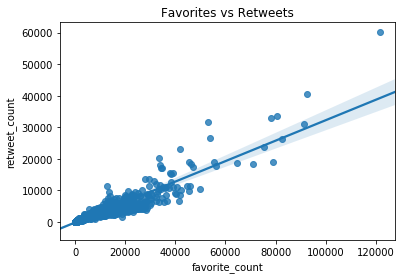

In [41]:
#Create a scatter plot with favorite count and retweet count.

sns.regplot(merged['favorite_count'],merged['retweet_count']).set_title('Favorites vs Retweets');